## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# scikit-learn 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공

#
####################################################################################

# Dataset 불러오기 및 data 정보 확인

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\iris.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [3]:
df = df[['Species', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width']]
df

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


# 모델 학습에 사용할 x값(예측변수) 설정

In [4]:
y = df.iloc[:, 0]
x = df.iloc[:, 1:]

# [ 참고 ] PCA와 군집분석을 연계시킬 경우

In [5]:
# 주성분 수행 전 변수 표준화

## 변수변환 모델 생성
scaler = StandardScaler()

## 변수변환 모델 적합 및 데이터 변환
x_scaled = scaler.fit_transform( x )

# 주성분 개수 설정
k = 2

# 주성분 개수를 k개로 하는 PCA 모델 생성
pca = PCA( n_components = k )

# 표준화된 변수에 대해 PCA 수행
x_pca = pca.fit_transform( x_scaled )

# 주성분으로 이루어진 새로운 x 데이터프레임 생성
x = pd.DataFrame( x_pca, columns = ['PC1', 'PC2'])
x

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [6]:
df.iloc[:, 1:]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 산점도 행렬 확인

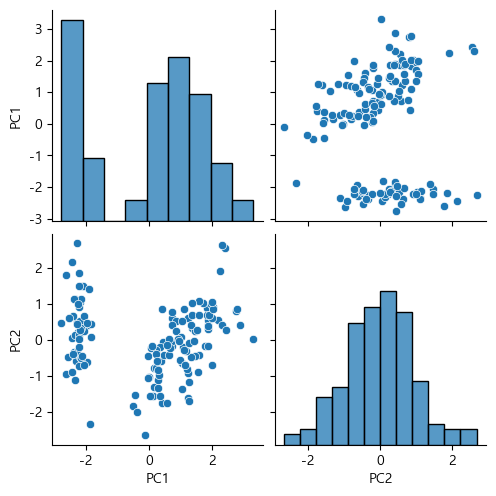

In [7]:
sb.pairplot( x )
plt.show()

# =================================

# 모델 생성 및 군집화 수행

- `sklearn.cluster.KMeans( n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto' )`
  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  - Parameters : 
    - n_clusters : int, default=8
    - init : 초기화 방법
      - k-means++ : 수렴 속도를 높이기 위해 스마트 방식으로 k-mean 군집화를 위한 초기 군집 중심을 선택
      - random : n_clusters초기 중심에 대한 데이터에서 무작위로 관측값(행)을 선택
    - n_init : int, default=10. k-평균 알고리즘이 다른 중심 시드로 실행되는 횟수.
    - max_iter : int, default=300. 단일 실행에 대한 k평균 알고리즘의 최대 반복 횟수
  - Attributes :
    - `.cluster_centers_` : 클러스터 중심의 좌표
    - `.labels_` : 각 지점의 label
    - `.inertia_` : sample과 그 sample로부터 가장 가까운 클러스터의 중심까지 거리의 제곱 합. 즉, 오차제곱합. 군집 내의 분산을 의미함.
  - Methods : `.fit()`, `.fit_predict()`, `.predict()`, `.transform()`, `.fit_transform()`  

In [8]:
# 일관된 조건으로 군집화 및 평가를 하기 위해 함수로 정의하여 사용
def kmeans(k):
    cluster_kmeans = KMeans( n_clusters = k,
                             init = 'random',
                             max_iter = 500,
                             random_state = 0 )
    return cluster_kmeans

## k값 선정
- k-means 모델의 결과 중 하나인 inertia 값 활용
- 군집 수에 따른 집단 내 제곱합을 살펴보고, 그래프 기울기가 크게 감소하는 시점의 k값을 선택

< inertia by k >
k = 1 :  574.8792432000105
k = 2 :  197.40381604541278
k = 3 :  115.02075663594012
k = 4 :  89.96708797374451
k = 5 :  66.99255090295995
k = 6 :  56.853247161490266
k = 7 :  47.96639965232255
k = 8 :  41.852172802589244
k = 9 :  32.478454471736924
k = 10 :  29.701770424081904


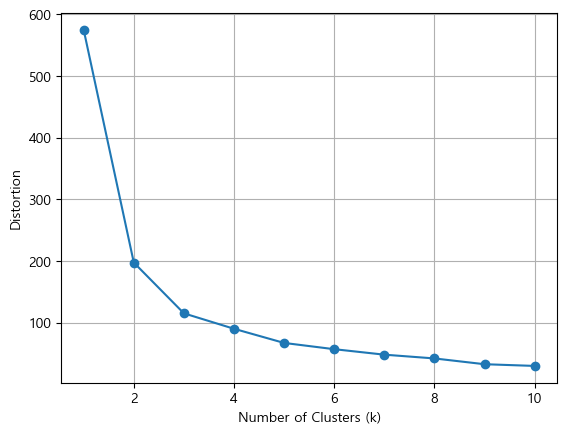

In [9]:
inertia = list()

print('< inertia by k >')
# k를 1부터 10까지 변화시켜가며 inertia를 측정
for k in range(1,11):
    model = kmeans(k).fit(x)
    inertia.append(model.inertia_)
    
    print( 'k =',k,': ', model.inertia_ )

# k에 따른 inertia의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.grid()
plt.show()

## 선정된 k값 모델로 군집화 수행 및 결과 확인

In [10]:
# k를 2개로 설정하고 군집 모델 학습
model = kmeans(2)

model.fit(x)

# 각각의 클러스터의 중심 확인
print('< centers >')
print(model.cluster_centers_)
print()

# 분류된 군집화 값 확인
print('< labels >')
print(model.labels_)
print()

< centers >
[[ 1.11237658 -0.14446373]
 [-2.22475316  0.28892745]]

< labels >
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



## 군집화 결과

In [11]:
# 새로운 데이터프레임에 cluster에 대한 컬럼 추가하고 군집화 값 입력
df_result = df.copy()
df_result.insert(1, 'km_cluster', model.labels_)
df_result

,Species,km_cluster,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,1,5.1,3.5,1.4,0.2
1,setosa,1,4.9,3.0,1.4,0.2
2,setosa,1,4.7,3.2,1.3,0.2
3,setosa,1,4.6,3.1,1.5,0.2
4,setosa,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,virginica,0,6.7,3.0,5.2,2.3
146,virginica,0,6.3,2.5,5.0,1.9
147,virginica,0,6.5,3.0,5.2,2.0
148,virginica,0,6.2,3.4,5.4,2.3


In [12]:
display( df_result.groupby('Species').count() )

display( df_result.groupby('km_cluster').count() )

,km_cluster,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
km_cluster,,,,,
0,100,100,100,100,100
1,50,50,50,50,50


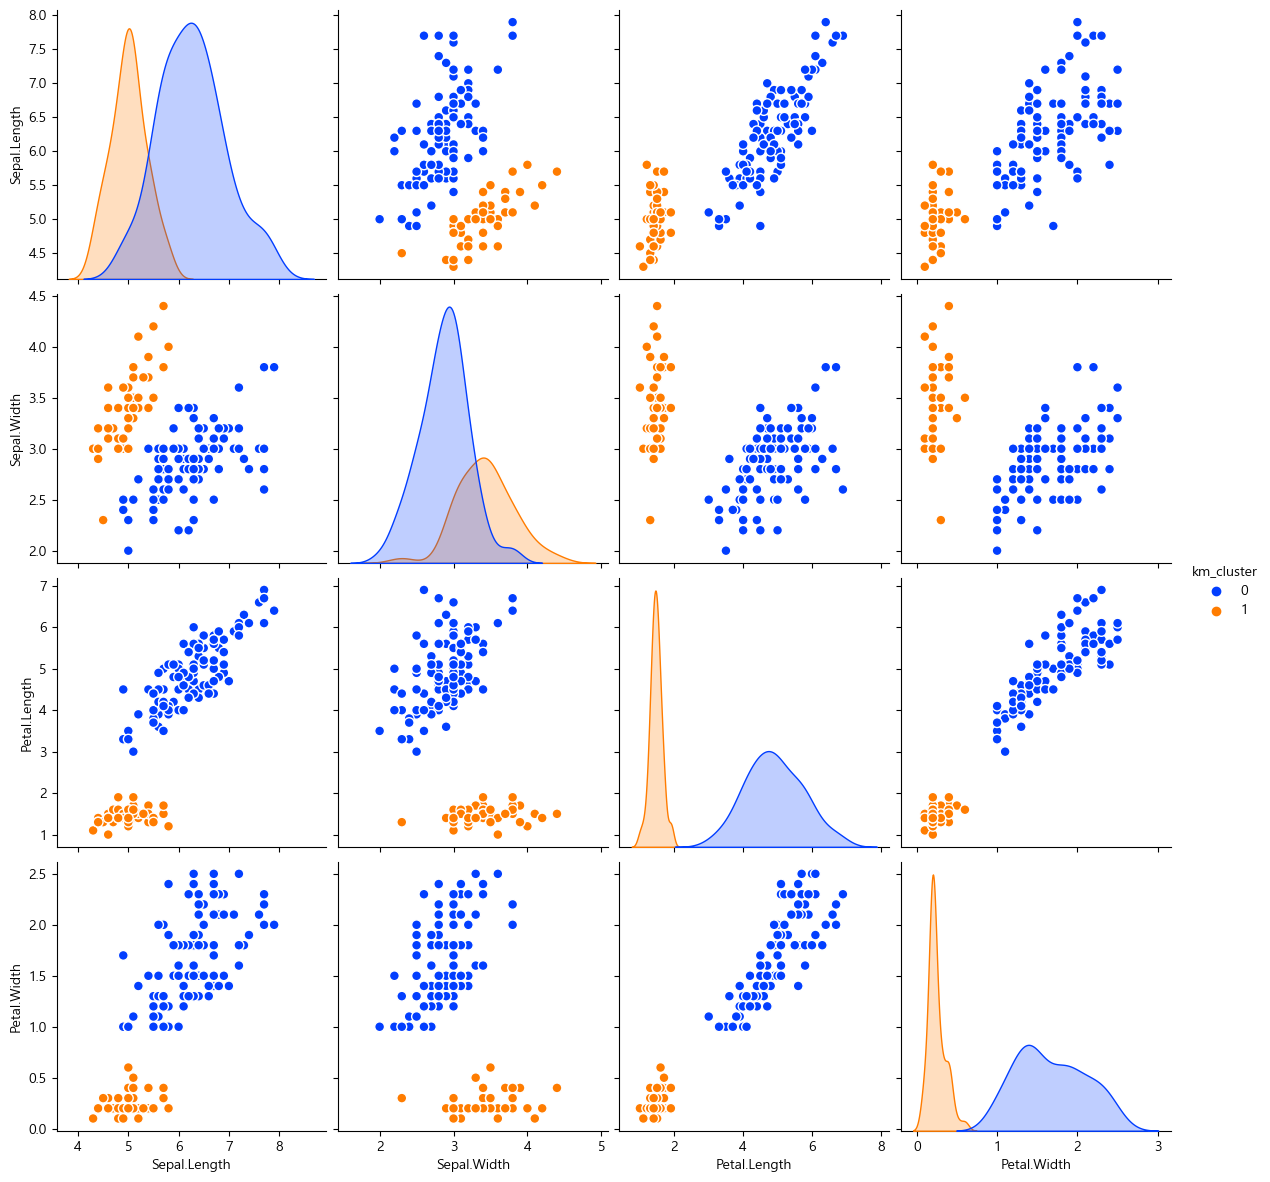

In [13]:
sb.pairplot( df_result,
             hue="km_cluster",
             palette='bright',
             size=3,
             plot_kws=dict(s=50, linewidth=1) )
plt.show()
print()
print()

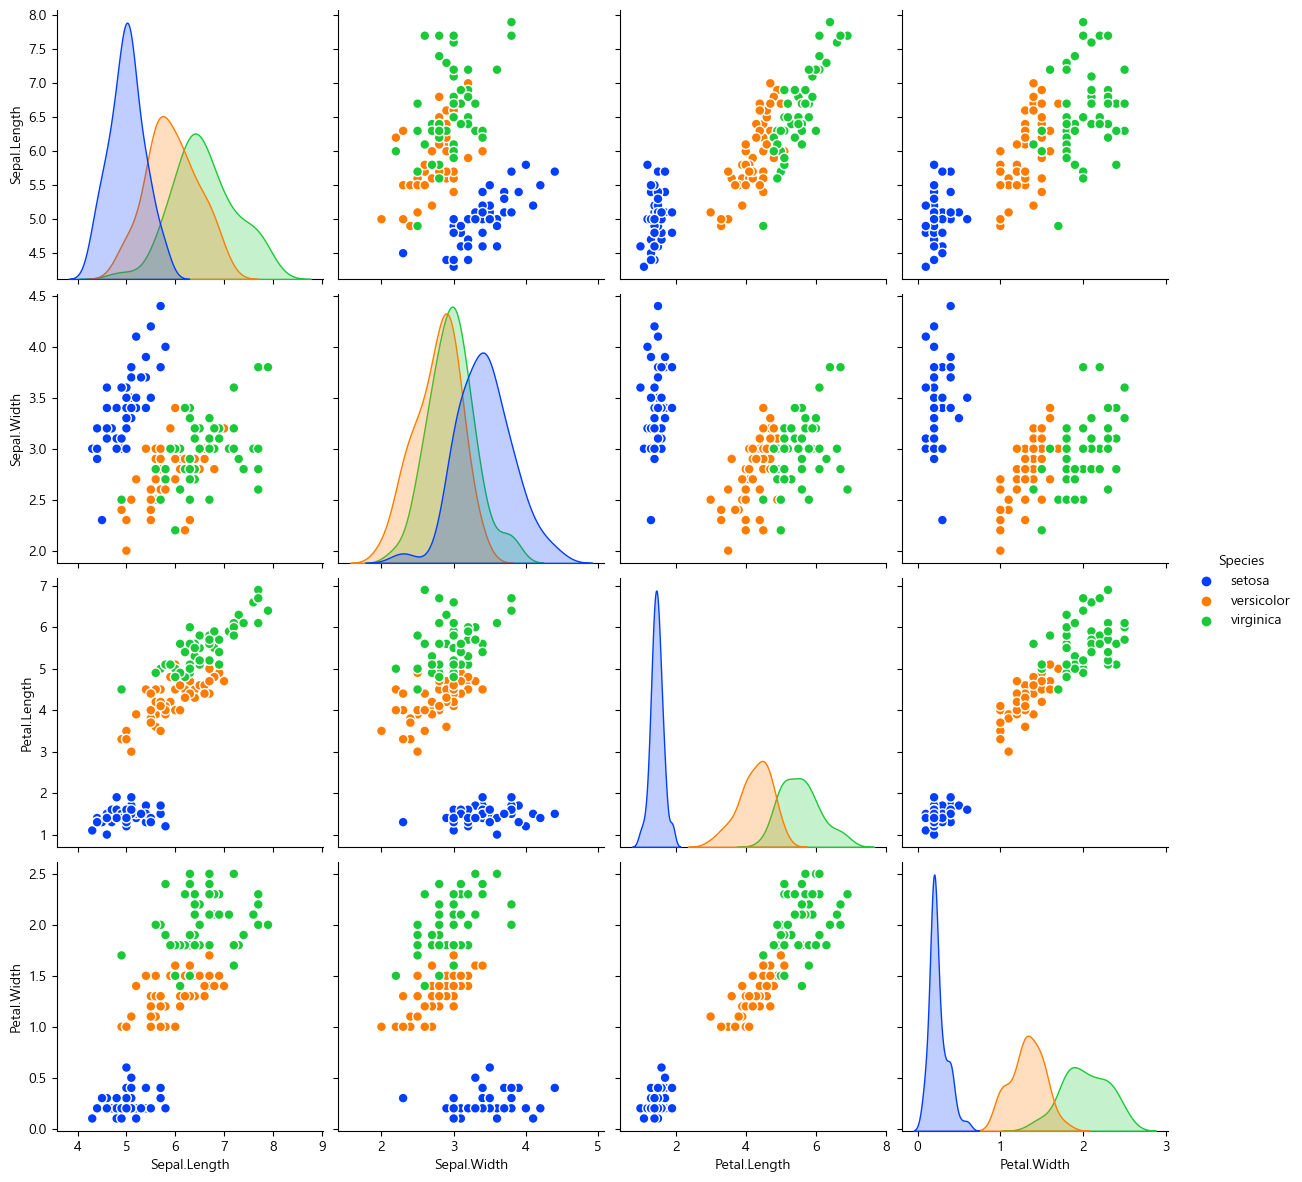

In [14]:
sb.pairplot( df,
             hue="Species",
             palette='bright',
             size=3,
             plot_kws=dict(s=50, linewidth=1) )
plt.show()
print()
print()

## 군집 예측 test - 새로운 데이터를 입력

In [15]:
# 군집 모델 적합에 PCA를 적용 했을 경우

# 예측할 데이터
data = [[ 5.0, 3.6, 1.4, 0.2 ]]

# 앞서 생성/적합된 변수표준화 모델을 사용하여 입력 데이터 변환
scaled = scaler.transform( data )

# 앞서 생성/적합된 PCA 모델을 사용하여 입력 데이터 변환
pca.transform( scaled )

# 변환된 데이터로 군집 예측
model.predict( pca.transform( scaled ) )

array([1])

# 모델 평가

## 외부평가: ARI (Adjusted Rand Index)

- 원래 데이터에 Target 값이 있을 경우의 평가 방법

- `sklearn.metrics.adjusted_rand_score( labels_true, labels_pred )`
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [16]:
print( 'ARI:',
       adjusted_rand_score( y, model.labels_ ).round(5) )

ARI: 0.56812


## 내부평가 ( Silhouette Coefficient )

- 원래 데이터에 Target 값이 없는 경우의 평가 방법

- 개별 데이터 각각의 실루엣 계수  
`sklearn.metrics.silhouette_samples( X, labels, *, metric='euclidean', **kwds )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

- 전체 데이터의 평균 실루엣 계수  
`sklearn.metrics.silhouette_score( X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds )`  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

$s(i)$ $=$ $b(i)-a(i)\over max( a(i),b(i) )$

### 개별 데이터 각각의 실루엣 계수

In [17]:
# 모든 개별 데이터의 실루엣 계수값을 구함. 
score_samples = silhouette_samples( x, model.labels_ )

# df_result에 각 행에 대한 실루엣 계수 컬럼 추가
df_result.insert(2, 'silhouette_coeff', score_samples )

df_result

,Species,km_cluster,silhouette_coeff,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,1,0.776280,5.1,3.5,1.4,0.2
1,setosa,1,0.659574,4.9,3.0,1.4,0.2
2,setosa,1,0.737500,4.7,3.2,1.3,0.2
3,setosa,1,0.696367,4.6,3.1,1.5,0.2
4,setosa,1,0.765796,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,virginica,0,0.680227,6.7,3.0,5.2,2.3
146,virginica,0,0.654674,6.3,2.5,5.0,1.9
147,virginica,0,0.692294,6.5,3.0,5.2,2.0
148,virginica,0,0.597651,6.2,3.4,5.4,2.3


### 군집별 평균 실루엣 계수

In [18]:
# 군집별 평균 실루엣 계수
group_silhouette = df_result.groupby('km_cluster')['silhouette_coeff'].mean()

print('< 군집별 평균 실루엣 계수 >\n', group_silhouette)
print()

< 군집별 평균 실루엣 계수 >
 km_cluster
0    0.573391
1    0.696779
Name: silhouette_coeff, dtype: float64



### 전체 평균 실루엣 계수

In [19]:
# 전체 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score( x, model.labels_ )

print( '전체 평균 실루엣 계수: {0:.4f}'.format(average_score) )
print()

전체 평균 실루엣 계수: 0.6145



### k값에 따른 군집별 실루엣 계수와 평균 실루엣 계수를 비교

< Average_Silhouette_Score by k >

k = 2 :  0.6145202036230452
k = 3 :  0.5091683341538228
k = 4 :  0.4744241563199707
k = 5 :  0.42588822699963624
k = 6 :  0.4263930942784438



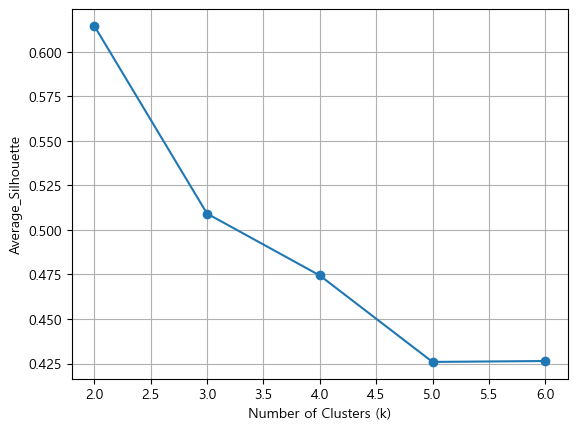

In [20]:
def silhouette_avg_k(a,b):
    avg_silhouette = list()
    print('< Average_Silhouette_Score by k >')
    print()
    
    for i in range(a,b):
        model = kmeans(i).fit(x)
        
        average_score = silhouette_score( x, model.labels_ )
        print( 'k =',i,': ', average_score )
        
        avg_silhouette.append(average_score)
    
    print()
    plt.plot(range(a,b), avg_silhouette, '-o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average_Silhouette')
    plt.grid()
    plt.show()

    
# k를 2부터 6까지 변화시켜가며 평균 실루엣 계수를 측정
silhouette_avg_k(2,7)
print()

In [21]:
def silhouette_avg_vs_group(a,b):
    print('< Average_Silhouette_Score >')
    print()
    
    for i in range(a,b):
        model = kmeans(i).fit(x)
        
        score_samples = silhouette_samples( x, model.labels_ )
        average_score = silhouette_score( x, model.labels_ )
        
        df = pd.DataFrame( { 'group' : model.labels_,
                             'Coeff' : score_samples,
                             'Avg' : average_score } )
        df['Coeff-avg'] = df['Coeff'] - df['Avg']
        
        display( df.groupby(['Avg','group'])[ ['Coeff','Coeff-avg'] ].mean() )
        

# 군집별 실루엣 계수와 평균 실루엣 계수를 비교        
silhouette_avg_vs_group(2,7)
print()

< Average_Silhouette_Score >



Coeff  Coeff-avg
Avg     group                     
0.61452 0      0.573391  -0.041129
        1      0.696779   0.082258

Coeff  Coeff-avg
Avg      group                     
0.509168 0      0.654065   0.144897
         1      0.430923  -0.078245
         2      0.441860  -0.067308

Coeff  Coeff-avg
Avg      group                     
0.474424 0      0.366464  -0.107960
         1      0.373628  -0.100796
         2      0.658944   0.184520
         3      0.424758  -0.049666

Coeff  Coeff-avg
Avg      group                     
0.425888 0      0.594271   0.168383
         1      0.441143   0.015255
         2      0.467452   0.041564
         3      0.412198  -0.013690
         4      0.346795  -0.079093

Coeff  Coeff-avg
Avg      group                     
0.426393 0      0.409382  -0.017011
         1      0.590170   0.163777
         2      0.346795  -0.079598
         3      0.395980  -0.030413
         4      0.483310   0.056917
         5      0.441143   0.014750

# 군집 분석 평가지표 시각화
- [참고] https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

## 클러스터링 개수별 실루엣 계수 시각화

In [22]:
### 여러 개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette_kmeans(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title( 'Number of Cluster : '+ str(n_cluster)+'\n' \
                            'Silhouette Score :' + str(round(sil_avg,3))+'\n' \
                            'Adjusted Rand Score :' + str( adjusted_rand_score(y,cluster_labels).round(3) ) )
        
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

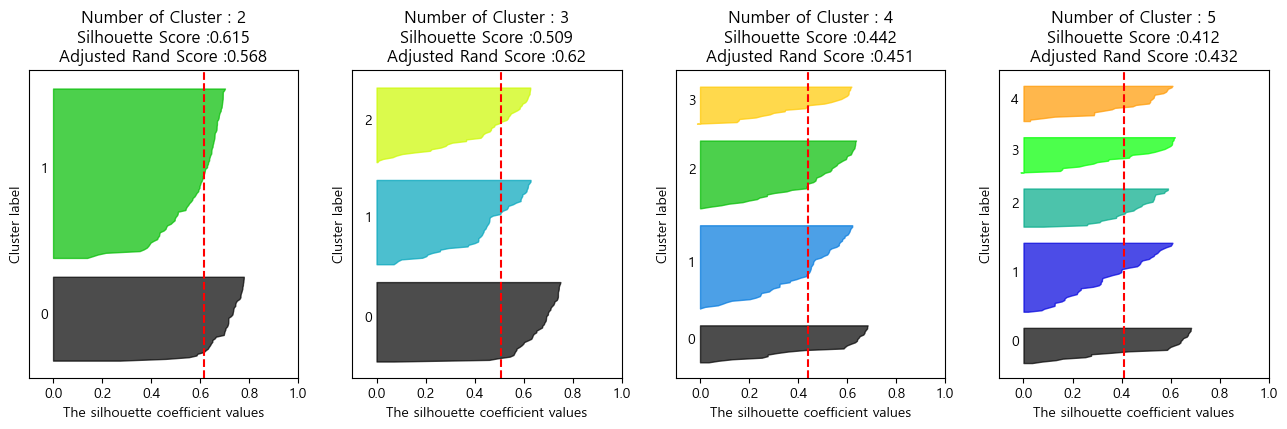

In [23]:
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette_kmeans( range(2,6), x )

## [ 참고 ] PCA 성분을 사용하여 군집 결과를 2차원 시각화

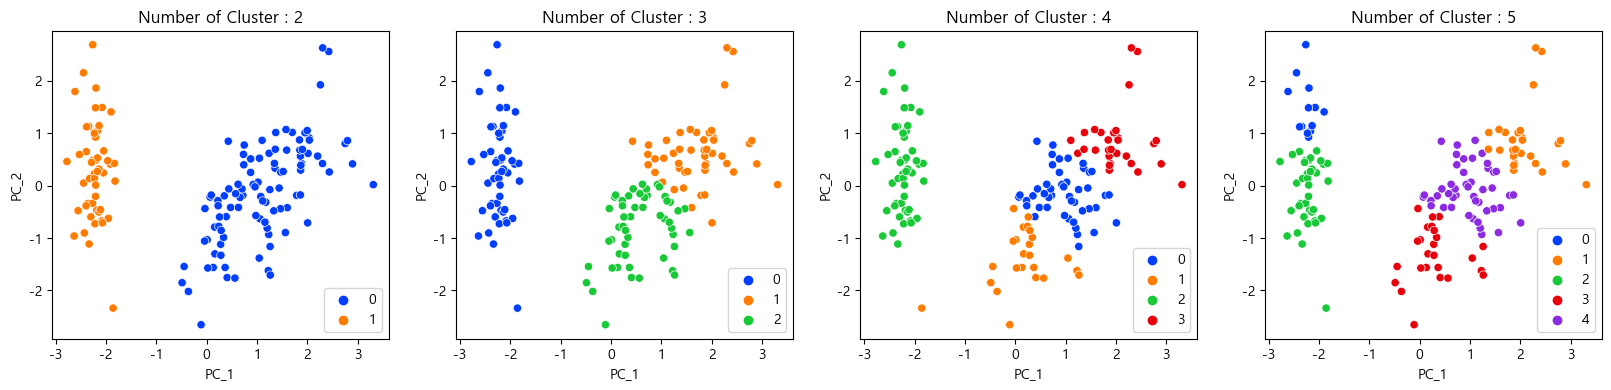

In [24]:
# 사전에 변수 표준화 및 PCA 분석이 완료된 후 수행

# 군집 개수별 주성분에 의한 시각화
plt.figure(figsize=(20,4))
for i in range(2,6):
    model = kmeans(i).fit(x)
    
    plt.subplot(1, 4, i-1 )
    sb.scatterplot( x = x_pca[:, 0],
                    y = x_pca[:, 1],
                    hue = model.labels_,
                    palette='bright')
    plt.title('Number of Cluster : '+ str(i))
    plt.xlabel("PC_1")
    plt.ylabel("PC_2")

# =================================

In [32]:
list( SCORERS.keys() )

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

# [ 참고 ] Hyper parameter 최적화

## Grid Search CV

- `sklearn.model_selection.GridSearchCV( estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False )`

  - 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.
  
  - Attributes: `cv_results_`, `best_score_`, `best_params_`, `best_estimator_`
  - Methods: `get_params()`
  - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 탐색할 파라미터 범위 지정

In [25]:
# 파라미터 목록 확인
model = KMeans( max_iter= 800, random_state = 100)
list( model.get_params().keys() )

['algorithm',
 'copy_x',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_jobs',
 'precompute_distances',
 'random_state',
 'tol',
 'verbose']

In [26]:
# 평가할 파라미터 split 조건 설정
params = { 'n_clusters' : range(2,6) }

### Grid Search 모델 생성 및 적합

In [27]:
# Grid Search 모델 생성
# scoring 옵션: 정확도는 'accuracy', AUC는 'roc_auc', 다중 클래스의 AUC는 'roc_auc_ovr'

grid_search = GridSearchCV( model,
                            param_grid = params,
                            scoring = 'adjusted_rand_score',
                            cv = 8,
                            return_train_score = True,
                            n_jobs = -1 )

# Grid Search 모델 적합
grid_search.fit( x, y )

GridSearchCV(cv=8, estimator=KMeans(max_iter=800, random_state=100), n_jobs=-1,
             param_grid={'n_clusters': range(2, 6)}, return_train_score=True,
             scoring='adjusted_rand_score')

In [28]:
# Grid Search 결과 데이터프레임 생성 
result_grid = pd.DataFrame( grid_search.cv_results_ )

result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,mean_train_score,std_train_score
0,0.058852,0.013998,0.005868,0.000604,2,{'n_clusters': 2},1.0,1.0,1.000000,1.0,...,0.459166,0.459166,0.522213,0.641447,0.641447,0.625550,0.635870,0.635870,0.577591,0.077753
1,0.052481,0.010606,0.006000,0.003201,3,{'n_clusters': 3},1.0,1.0,0.859951,0.0,...,0.486994,0.511339,0.599952,0.640548,0.659111,0.657418,0.644454,0.677702,0.609690,0.067388
2,0.065249,0.008862,0.006246,0.002164,4,{'n_clusters': 4},1.0,1.0,0.732066,0.0,...,0.433408,0.441783,0.540032,0.450652,0.470312,0.466036,0.505138,0.505653,0.476627,0.034613
3,0.066112,0.007783,0.004001,0.000507,5,{'n_clusters': 5},0.0,0.0,0.455156,0.0,...,0.394203,0.377653,0.447297,0.459529,0.435221,0.455812,0.448201,0.466147,0.435508,0.030169


In [29]:
# Test Score 기준으로 정렬하여 결과 출력
result_grid[ ['params',
              'mean_train_score',
              'mean_test_score',
              'rank_test_score'] ].sort_values(['rank_test_score']).round(4)

,params,mean_train_score,mean_test_score,rank_test_score
0,{'n_clusters': 2},0.5776,0.8750,1
1,{'n_clusters': 3},0.6097,0.4127,2
2,{'n_clusters': 4},0.4766,0.3967,3
3,{'n_clusters': 5},0.4355,0.0748,4


#### 최적의 파라미터 출력

In [30]:
# 최적 파라미터 출력
print("최고 Score: ", grid_search.best_score_.round(4) )
print("최적 Parameters: ", grid_search.best_params_ )
print("최적 Estimators: ", grid_search.best_estimator_ )
print()

최고 Score:  0.875
최적 Parameters:  {'n_clusters': 2}
최적 Estimators:  KMeans(max_iter=800, n_clusters=2, random_state=100)



#### 파라미터의 값에 따른 score 비교 (Train_data vs. Test_data)

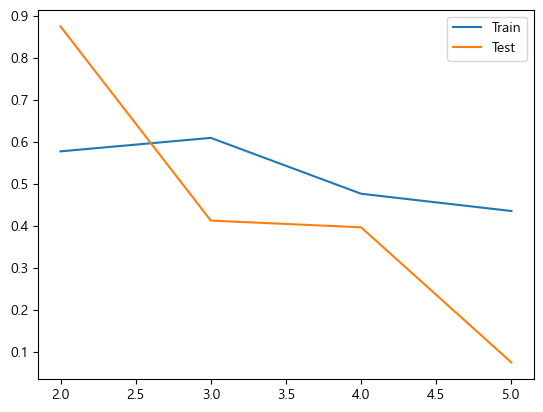

In [31]:
plt.plot( result_grid.param_n_clusters,
          result_grid[ 'mean_train_score' ],
          label = 'Train')

plt.plot( result_grid.param_n_clusters,
          result_grid[ 'mean_test_score' ],
          label = 'Test')

plt.legend()
plt.show()